In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point # for Point()
import shapely.geometry
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH

In [4]:
#watersheds = "/Users/matthewwilliamhaas/Documents/wild_rice/dnr_watersheds/dnr_watersheds_dnr_level_02_huc_04.shp"
states = "/Users/matthewwilliamhaas/Documents/shapefile_data_sources/cb_2018_us_county_20m/cb_2018_us_county_20m.shp"

In [5]:
collection_sites = "/Users/matthewwilliamhaas/Documents/wild_rice/200224_wild_rice_samples.csv" # This updated file has GPS coordinates converted to Universal Transverse Mercator (UTM) format

map_states = gpd.read_file(states) # read in watersheds
nwr_sites = pd.read_csv(collection_sites) # read in collection sites

In [15]:
# This code is crucial to achieving the projection that I want (matches the great MN GIS data)
map_states = map_states.to_crs({"init" : "epsg:26915"})

In [51]:
# Select Minnesota from the US shape file
#These lines of code are not needed if I stick with the shape file provided by the State of Minnesota versus the Census Bureau
MN_WI = map_states[(map_states.STATEFP == "27") | (map_states.STATEFP == "55")] # MN is 27 and WI is 55

In [7]:
# This section is for converting the latitude and longitude data into a form recognizable to geopandas
# The issue with the original projection issue is that the latitude and longitude needed to be converted to UTM format. I did the conversion of GPS coordinates with an online tool and created new columns in the CSV file containing the sample collection data.
def make_point(row):
    return Point(row.UTM_easting, row.UTM_northing) # Point() requires shapely.geometry

points = nwr_sites.apply(make_point, axis=1)
nwr_points = gpd.GeoDataFrame(nwr_sites, geometry=points)

In [8]:
# Not a very elegant approach, but this is how I think I need to go about plotting unique colors for each lake
aquatica = nwr_points[nwr_points.Location == "Aquatica_species"]
bass = nwr_points[nwr_points.Location == "Bass Lake"]
bigfork = nwr_points[nwr_points.Location == "Big Fork River"]
clearwater = nwr_points[nwr_points.Location == "Clearwater River"]
dahler = nwr_points[nwr_points.Location == "Dahler Lake"]
decker = nwr_points[nwr_points.Location == "Decker Lake"]
garfield = nwr_points[nwr_points.Location == "Garfield Lake"]
mudhen = nwr_points[nwr_points.Location == "Mud Hen Lake"]
necktie = nwr_points[nwr_points.Location == "Necktie River"]
ottertail = nwr_points[nwr_points.Location == "Ottertail River"]
phantom = nwr_points[nwr_points.Location == "Phantom Lake"]
plantagenet = nwr_points[nwr_points.Location == "Plantagenet"]
shell = nwr_points[nwr_points.Location == "Shell Lake"]
upperrice= nwr_points[nwr_points.Location == "Upper Rice Lake"]
ncroc = nwr_points[nwr_points.Location == "NCROC"]

In [26]:
dict = {'Aitkin': 'yellow'}

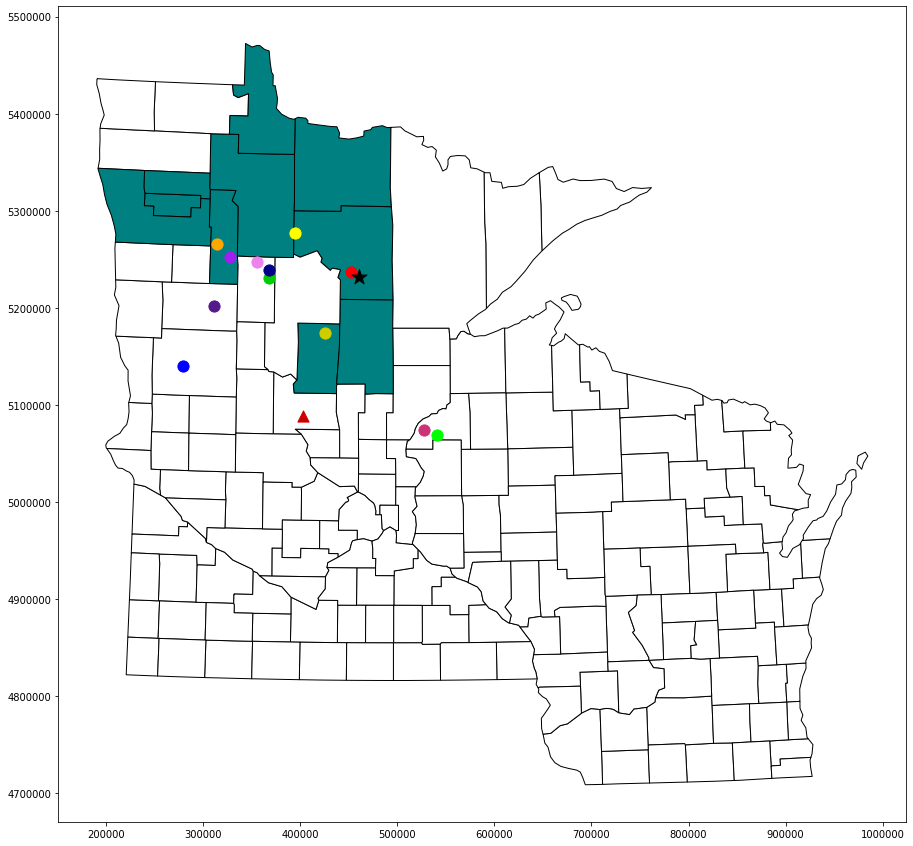

In [96]:
# Start the plotting
fig, ax = plt.subplots(1, figsize=(20,15))
MN_WI.plot(color=MN_WI['color'], linewidth=1.0, ax=ax, edgecolor="black")
aquatica.plot(marker="^", markersize=125, ax=ax, color="#cd0000" ) # Aquatica
bass.plot(markersize=125, ax=ax, color="#ff0000") # Bass Lake
#bigfork.plot(markersize=125, ax=ax, color="#cd8500")# Big Fork River
clearwater.plot(markersize=125, ax=ax, color="#ffa600") # Clearwater River
dahler.plot(markersize=125, ax=ax, color="#cdcd00") # Dahler Lake
decker.plot(markersize=125, ax=ax, color="#ffff00") # Decker Lake
garfield.plot(markersize=125, ax=ax, color="#00cd00") # Garfield Lake
mudhen.plot(markersize=125, ax=ax, color="#00ff00") # Mud Hen Lake
necktie.plot(markersize=125, ax=ax, color="#00008b") # Necktie River
ottertail.plot(markersize=125, ax=ax, color="#0000ff") # Ottertail River
phantom.plot(markersize=125, ax=ax, color="#cd3278") # Phantom Lake
plantagenet.plot(markersize=125, ax=ax, color="#ee82ee") # Plantagenet
shell.plot(markersize=125, ax=ax, color="#541a8b") # Shell Lake
upperrice.plot(markersize=125, ax=ax, color="#a020f0") # Upper Rice Lake
ncroc.plot(marker="*", markersize=250, ax=ax, color="black")

In [95]:
MN_WI.loc[MN_WI['STATEFP'] == '55', 'color'] = 'white'
MN_WI.loc[MN_WI['STATEFP'] == '27', 'color'] = 'white'
MN_WI.loc[MN_WI['NAME'] == 'Aitkin', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Beltrami', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Clearwater', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Crow Wing', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Itasca', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Koochiching', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Lake of the Woods', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Pennington', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Polk', 'color'] = 'teal'
MN_WI.loc[MN_WI['NAME'] == 'Red Lake', 'color'] = 'teal'
MN_WI.loc[MN_WI['STATEFP'] == '55', 'color'] = 'white' # do WI last so the Polk County in WI gets plotted as white, not teal

In [63]:
MN_WI

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,color,"(False, color)"
10,55,061,01581090,0500000US55061,55061,Kewaunee,06,886951858,1921336271,"POLYGON ((915375.913 4957846.769, 916302.335 4...",white,white
22,55,113,01581116,0500000US55113,55113,Sawyer,06,3257216619,239883874,"POLYGON ((611859.333 5112516.578, 660254.764 5...",white,white
24,55,031,01581075,0500000US55031,55031,Douglas,06,3378102266,454243357,"POLYGON ((554455.690 5121405.392, 554350.112 5...",white,white
27,55,041,01581080,0500000US55041,55041,Forest,06,2626878508,83594186,"POLYGON ((806117.575 5099684.274, 814991.703 5...",white,white
29,27,005,00659448,0500000US27005,27005,Becker,06,3406054658,336952350,"POLYGON ((257818.384 5226913.484, 267493.832 5...",white,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,55,051,01581085,0500000US55051,55051,Iron,06,1963699141,416924548,"POLYGON ((687801.490 5162104.994, 691058.385 5...",white,white
3187,27,045,00659468,0500000US27045,27045,Fillmore,06,2230746819,2055506,"POLYGON ((544301.681 4853595.060, 545450.530 4...",white,white
3188,55,049,01581084,0500000US55049,55049,Iowa,06,1975379906,13870324,"POLYGON ((708811.285 4786336.435, 715224.074 4...",white,white
3189,55,037,01581078,0500000US55037,55037,Florence,06,1264232458,24111636,"POLYGON ((834482.202 5104634.701, 836283.678 5...",white,white


In [97]:
# Generate info for legend
legend_points = [Line2D([0],[0], color="#cd0000", marker="^", markersize=25, linestyle="none", label="$\it{Z. aquatica}$"), 
				 Line2D([0],[0], color="#ff0000", marker="o", markersize=25, linestyle="none", label="Bass Lake"), 
				 #Line2D([0],[0], color="#cd8500", marker="o", markersize=25, linestyle="none", label="Big Fork River"), 
				 Line2D([0],[0], color="#ffa600", marker="o", markersize=25, linestyle="none", label="Clearwater River"), 
				 Line2D([0],[0], color="#cdcd00", marker="o", markersize=25, linestyle="none", label="Dahler Lake",), 
				 Line2D([0],[0], color="#ffff00", marker="o", markersize=25, linestyle="none", label="Decker Lake"), 
				 Line2D([0],[0], color="#00cd00", marker="o", markersize=25, linestyle="none", label="Garfield Lake"), 
				 Line2D([0],[0], color="#00ff00", marker="o", markersize=25, linestyle="none", label="Mud Hen Lake"), 
				 Line2D([0],[0], color="#00008b", marker="o", markersize=25, linestyle="none", label="Necktie River"), 
				 Line2D([0],[0], color="#0000ff", marker="o", markersize=25, linestyle="none", label="Ottertail River"), 
				 Line2D([0],[0], color="#cd3278", marker="o", markersize=25, linestyle="none", label="Phantom Lake"), 
				 Line2D([0],[0], color="#ee82ee", marker="o", markersize=25, linestyle="none", label="Plantagenet"), 
				 Line2D([0],[0], color="#541a8b", marker="o", markersize=25, linestyle="none", label="Shell Lake"), 
				 Line2D([0],[0], color="#a020f0", marker="o", markersize=25, linestyle="none", label="Upper Rice Lake"),
                 Line2D([0],[0], color="black", marker="*", markersize=25, linestyle="none", label="NCROC")]




In [98]:
# Plot the legend
ax.legend(handles=legend_points, loc="lower right", facecolor="white", prop={"size":20}) # I thought facecolor would make background white vs. partially transparent. Maybe I'm using it wrong?

# Define scalebar
scalebar = ScaleBar(dx=1, units="m", dimension=SI_LENGTH, location="lower center", pad=-2, font_properties="Times-30")

# Add scale bar
ax.add_artist(scalebar)

# If you want to re-add the title, remove the pound symbol (#) from the next line (it was commented out for publication)
#fig.suptitle("Nothern Wild Rice Collection Sites\nBy Watershed", family="serif")
ax.axis("off") # turn off the axis

fig.savefig("county_map_growing_regions_colored.png", dpi=300)